<a href="https://colab.research.google.com/github/Stephaaniee/ProjectWork/blob/main/TstTst2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from fastai.vision.all import *
from fastai.data.core import DataLoader
import random
import re
import os
import shutil
import PIL
import torch
import numpy as np
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files
from fastai.data.core import DataLoaders
from fastbook import *
import pathlib
import tensorflow as tf

In [1]:
pip install fastbook

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl 

In [3]:
set_seed(42)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#  #split data
# import splitfolders
# splitfolders.ratio(r'C:\Users\okosa.s\Documents\Project Work\FirstTest\sugar_beets', output="output", seed=1337, ratio=(.8, 0.1,0.1))

In [5]:
#ensuring the images are the same size , label and augument the data
item_tfms = RandomResizedCrop(460, min_scale = 0.75, ratio=(1., 1.)),
batch_tfms = [*aug_transforms(size = 224, max_warp=0), Normalize.from_stats(*imagenet_stats)] #scaling the image to train faster
bs=64

In [6]:
#Blueprint for how the data is defined
dataTest = DataBlock(
    blocks = (ImageBlock, CategoryBlock), #Datablock class (input, output)
    get_items = get_image_files, #use this function to get the input, output (not restricted to x and y inout when you have more than 2 parameters)
    splitter = RandomSplitter(valid_pct = 0.2, seed= 42), # split dataset when training the dataset
    # get_y = using_attr(RegexLabeller(pat = r'([\w]+).\d+..*$'), 'name'),
    get_y = parent_label, #image labels
    item_tfms = RandomResizedCrop(460, min_scale = 0.75, ratio=(1., 1.)), #Label and augument the transforms
    batch_tfms = [*aug_transforms(size = 224, max_warp=0), Normalize.from_stats(*imagenet_stats)] #scaling the image to train faster
)

In [7]:
dls = dataTest.dataloaders('/content/drive/MyDrive/sugar_beets', bs=32)#Takes the dataset input, and batch size and applies this to the dataloader
#the item transform occurs on the CPU , and batch transform occurs after the item transform on the GPU

In [8]:
dls.vocab #to view classes
# dls.vocab.o2i #converts the strings to numerical values during train

['healthy', 'sick']

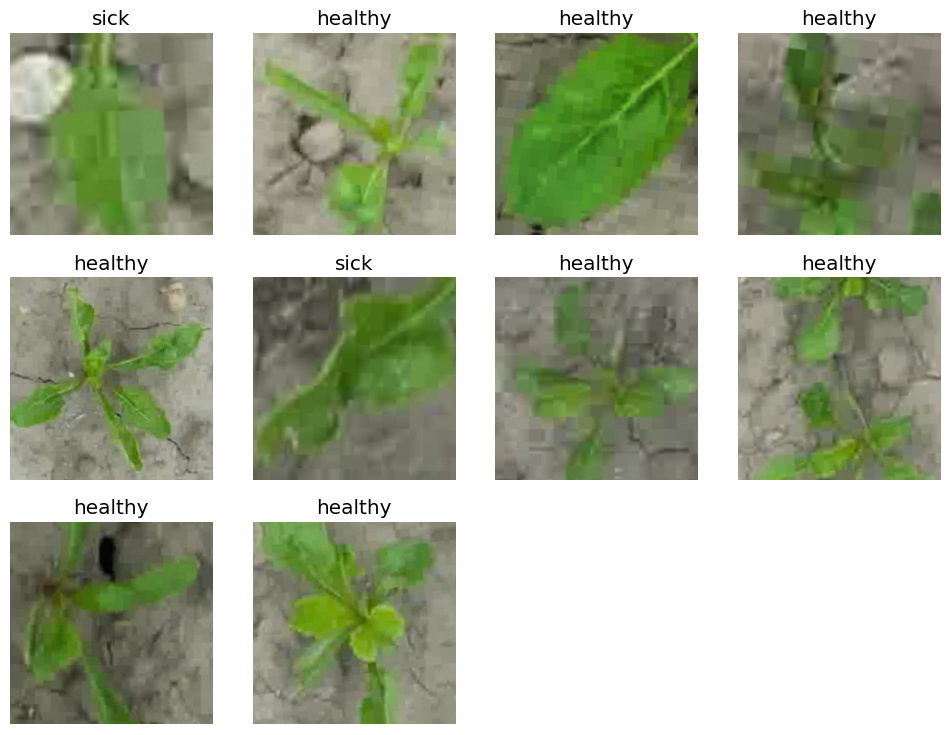

In [9]:
dls.show_batch(max_n=10)

In [10]:
learn = vision_learner(dls, resnet34, metrics = error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 145MB/s]


In [12]:
learn.fit_one_cycle(4) # iterate over the data in 4 cycles

epoch,train_loss,valid_loss,error_rate,time
0,0.464289,0.324352,0.128770,51:38
1,0.310230,0.276839,0.113399,02:46
2,0.266794,0.264120,0.107019,02:43
3,0.261534,0.257270,0.106729,02:42


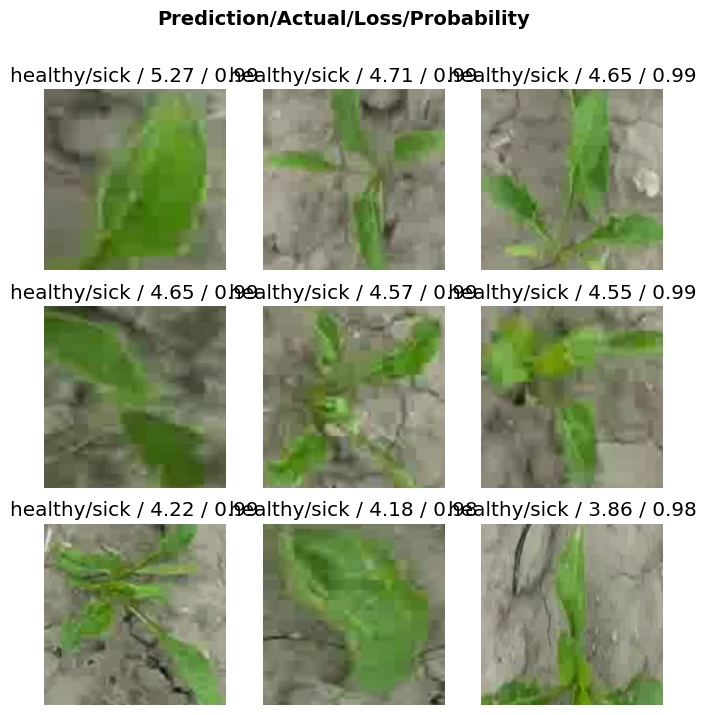

In [13]:
# Analyse how the model performed
results = ClassificationInterpretation.from_learner(learn)
#takes the function plot_top losses and shows the 9 top losses
results.plot_top_losses(9, figsize = (8, 8)) #This shows the probability of the losses

In [14]:
learn.save('TST_DETR')

Path('models/TST_DETR.pth')

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


AttributeError: type object 'Interpretation' has no attribute 'most_confused'

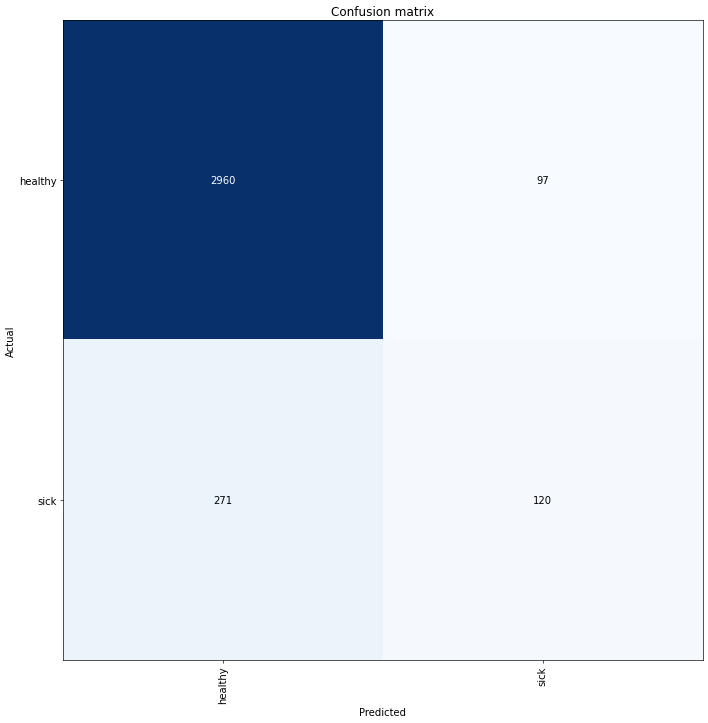

In [16]:
#confusion matrix to understnad how the model is behaving with respect to the real data
results.plot_confusion_matrix(figsize=(12,12), dpi=60) #(The diagonal values are the actual recognized values)
 #The most confussed dataset in the model in this case 3
Interpretation.most_confused(min_value=3)

In [ ]:

#Finetuning the model
learn.load('TST_DETR')

In [ ]:
learn.unfreeze
#Train the entire model not only the last layer of the model

In [ ]:
learn.lr_find()
#Find the new lr of the model

In [ ]:
learn = vision_learner(dls, resnet34, metrics=accuracy).to_fp16()
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,accuracy,time
0,1.202579,0.669641,0.649275,00:15
1,0.955936,0.527597,0.771015,00:15
2,0.740168,0.465260,0.788406,00:15
3,0.593400,0.374649,0.840580,00:16
4,0.475106,0.368183,0.849275,00:14
5,0.446609,0.364246,0.849275,00:15


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,time
0,0.299025,0.404674,0.156522,00:15
1,0.312649,0.394446,0.168116,00:15
2,0.310524,0.401781,0.144928,00:15
3,0.290704,0.398950,0.156522,00:16
4,0.267357,0.395304,0.147826,00:16
5,0.257994,0.398863,0.153623,00:16
6,0.249475,0.403471,0.153623,00:16
7,0.239608,0.393673,0.153623,00:15
8,0.236409,0.396317,0.150725,00:17
9,0.226091,0.393425,0.156522,00:15


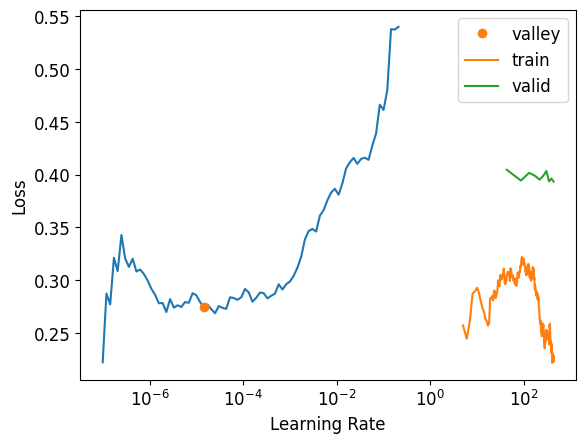

In [ ]:
model.unfreeze()
model.lr_find()
model.fit_one_cycle(10, lr_max = slice (2e-5,6e-5)) #modify to the learning rates range you find
model.save("awesome")
model.recorder.plot_loss()

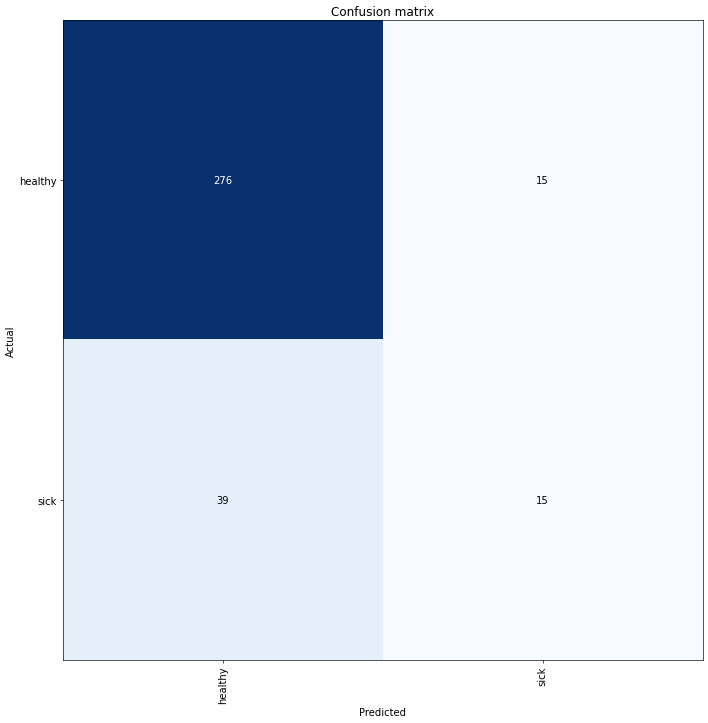

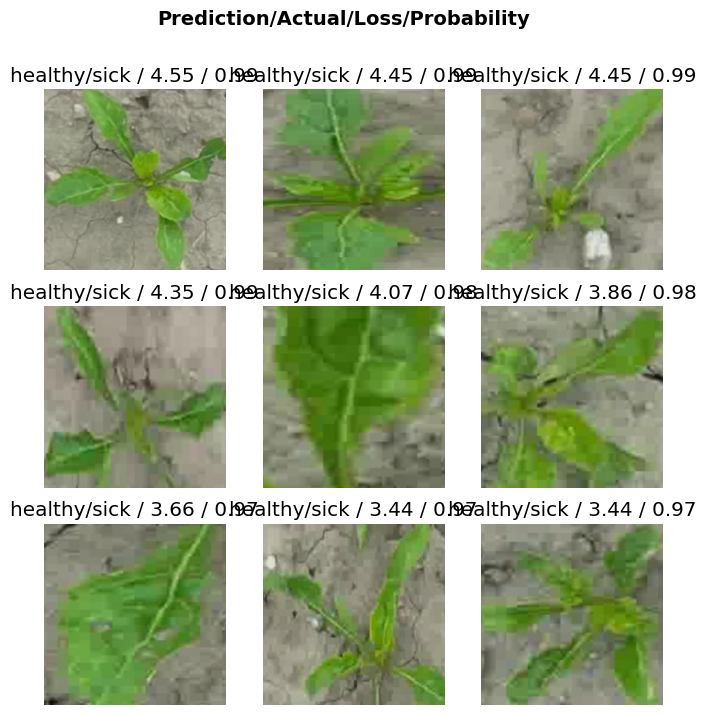

In [ ]:
results = ClassificationInterpretation.from_learner(model)
results.plot_confusion_matrix(figsize=(12,12), dpi=60)
results.plot_top_losses(9, figsize = (8, 8))

In [ ]:
#  export its meta data as a .pkl file, and then load it later for inference
#to export the model
model.export('/content/drive/MyDrive/savedTrainedImages/tst2_model.pkl')

# to load the model for inference
learner_inf = load_learner('/content/drive/MyDrive/savedTrainedImages/tst2_model.pkl')

In [ ]:
#Evaluate our training with the test dataset

test_dl = dls.test_dl(get_image_files_sorted("/content/drive/MyDrive/output/test"))

# getting the predictions of our model
preds, _ = learner_inf.get_preds(dl=test_dl)

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


In [ ]:
import tensorflow as tf

print(tf.shape(preds))

tf.Tensor([1728    2], shape=(2,), dtype=int32)


In [ ]:

# first, we figure out the index that has the max probability in each row
# this is the index of the class our model believes the test image belongs to
y = torch.argmax(preds, dim=1)

# now, we make use of the o2i methods to find the class associated with each index
# since o2i is actually a mapping from class to index value, we modify the code to compute the reverse mapping
cls_preds = list(map(lambda x: list(dls.vocab.o2i.keys())[list(dls.vocab.o2i.values()).index(x)], y))

# print our predictions of each test image
print(len(cls_preds))

1728


In [ ]:

# compare predictions with the actual test labels

# load in the paths of all test images
imgs = get_image_files_sorted('/content/drive/MyDrive/output/test')
# extract the labels of each image
for i in range(len(imgs)):
  # compare model predictions with actual output
  comp = [x == y for x,y in zip(cls_preds, imgs)]

  # if we sum up our comparison list, we total comes out as 28
  # this means that all 28 of our predictions was correct
  sum(comp)

In [ ]:
len(comp)

1728

In [ ]:
https://medium.com/@FastAIButMakeItSlow/image-classification-using-fastai-dogs-vs-cats-project-bbe752a4bcf8
https://course18.fast.ai/lessons/lesson1.html
https://www.youtube.com/watch?v=93kXzUOiYY4